#### Wesleyan University ASTR 221

## Tutorial 2: Three-dimensional gridding

Last time, we took advantage of the spherical symmetry of the NFW profile to represent that 3D distribution of mass on a one-dimensional grid.  For more complicated situations (such as in the homework), however, we'll need to more explicitly represent that space on a three-dimensional grid.  Today we'll practice by depositing the Milky Way's NFW profile onto a 3D grid in a few different ways.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120  
from math import pi

Recall that the NFW profile has the following shape,

$$\rho(r) = \frac{\rho_s}{(r/r_s)(1+r/r_s)^2}$$

with $\rho_s = 7 \times 10^{-3}~{\rm M}_\odot/{\rm pc}^3$ and $r_s = 20~{\rm kpc}$ for the Milky Way's halo.  Thus, our 3D space should be centered on the point where $r = 0$.

There are a number of 3D coordinate systems we could, in theory, use to define our grid.  The simplest of these is Cartesian ($x,y,z$) coordinates, although it may be temping to use spherical coordinates ($r,\theta,\phi$) given the symmetry of the problem - we'll return to this later.

Each point in space will be represented by an x-coordinate, a y-coordinate, and a z-coordinate.  Let's say that we want the grid to go out to $r=100$ kpc, and have a resolution of 0.5 kpc.  Thus, each coordinate axis will have 400 grid points (200 on each side of 0) as follows:

In [4]:
# Construct array of equally-spaced grid points
xmin = -100.
xmax = 100.
dx = 0.5
ncells = int((xmax - xmin)/dx)
dx = (xmax - xmin)/ncells   # For consistency, just in case it didn't go in evenly

xmids = np.linspace(xmin, xmax, ncells+1)[1:] - dx/2.

Now we have a 1D axis.  How do we convert this to 3D coordinates?  A very useful method in numpy is [meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), which takes N sets of 1D axis vectors and constructs the N-dimensional coordinate arrays corresponding to the combination of those vectors.  So if we had a vector ```x1d``` for the x-axis, ```y1d``` for the y-axis, and ```z1d``` for the z-axis, we could convert these into 3D coordinate arrays as
```x3d, y3d, z3d = np.meshgrid(x1d, y1d, z1d)```.  (It may swap around the order of the axes depending on whether you are in 'xy' or 'ij' mode, see documentation.  In our case it doesn't matter because all three coordinates have the same grid points.)

In our case, we can use this function as

In [5]:
# Construct 3D coordinate arrays from 1D grids
x, y, z = np.meshgrid(xmids, xmids, xmids)

Check out the top corner of each of these arrays, and see how each one varies in a different direction:

In [6]:
x[:3,:3,:3]

array([[[-99.75, -99.75, -99.75],
        [-99.25, -99.25, -99.25],
        [-98.75, -98.75, -98.75]],

       [[-99.75, -99.75, -99.75],
        [-99.25, -99.25, -99.25],
        [-98.75, -98.75, -98.75]],

       [[-99.75, -99.75, -99.75],
        [-99.25, -99.25, -99.25],
        [-98.75, -98.75, -98.75]]])

In [7]:
y[:3,:3,:3]

array([[[-99.75, -99.75, -99.75],
        [-99.75, -99.75, -99.75],
        [-99.75, -99.75, -99.75]],

       [[-99.25, -99.25, -99.25],
        [-99.25, -99.25, -99.25],
        [-99.25, -99.25, -99.25]],

       [[-98.75, -98.75, -98.75],
        [-98.75, -98.75, -98.75],
        [-98.75, -98.75, -98.75]]])

In [8]:
z[:3,:3,:3]

array([[[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]],

       [[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]],

       [[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]]])

Notice how many grid points we have in total!  This is **WAY** more expensive than the way we did it in 1D.  In general, 2D calculations are much more expensive than 1D calculations, and 3D calculations are much more expensive than 2D calculations.

In [9]:
x.size

64000000

With our grid now fully defined, we can calculate the mass at each point.  

But wait!  The NFW profile is a function of r, not x, y, and z!  That means we will first have to calculate r, then rho:

In [10]:
# Calculate radius at each grid point
r = np.sqrt(x**2 + y**2 + z**2)

# Define constants
rho0 = 7.e-3 * (1e3)**3 
rs = 20.

# NFW profile
rho = rho0/(r/rs)/(1+r/rs)**2

rho.shape

(400, 400, 400)

Hooray, we now have a model of the halo!  If we put a "sightline" down the center of one face of the cube (keep two coordinates fixed and see how the density varies along the third, which is a radial track if the two fixed coordinates are 0), we should recover the same profile we saw last time:

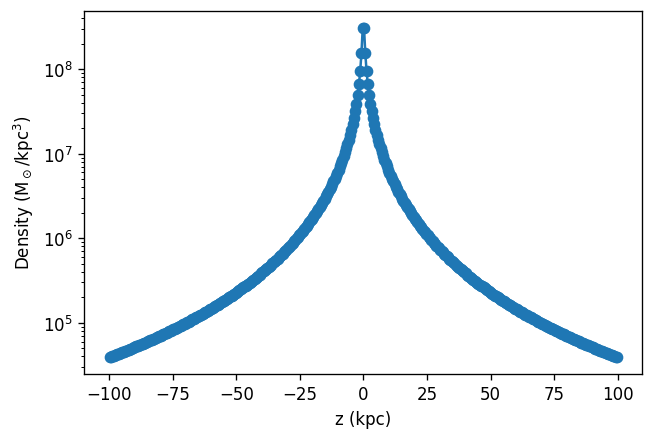

In [14]:
# Define fixed array indices for x and y
ix = int(ncells/2) # To get as close to the center as possible
iy = int(ncells/2)

fig, ax = plt.subplots()
plt.plot(xmids, rho[ix,iy,:], '-o')
ax.set_xlabel('z (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')
#ax.set_xscale('log')
ax.set_yscale('log')


Because we have the full 3D information, we can even drop multiple sightlines at different x-values and see how things change:

In [ ]:
# Define fixed array indices for x and y
ixs = [0,49,99,149,199] 
iy = int(ncells/2)

fig, ax = plt.subplots()
for ix in ixs:
    plt.plot(xmids, rho[ix,iy,:], '-')
ax.set_xlabel('z (kpc)')
ax.set_ylabel(r'Density (M$_\odot$/kpc$^3$)')
#ax.set_xscale('log')
ax.set_yscale('log')

As before, we can calculate the total mass by multiplying the density of each cell by the volume it represents.  In this case, the volume of each cell is simply $(dx)^3$:

In [12]:
np.log10(np.sum(rho*dx**3))

11.887865386367421

(This mass is slightly lower than the one we calculated before because our domain does not extend as far.)

## Other coordinate systems

A Cartesian grid is the simplest choice, but other types of grids may be useful for specific problems.  Disks, for example, are often represented on a cylindrical grid with $(R,\theta, z)$ coordinates.  How would we do that here, if we so chose?  We would have to construct a different initial 1D grid for each axis,

In [15]:
n_rcyl = 200
rcyl_min = 0.
rcyl_max = 100.
drcyl = (rcyl_max - rcyl_min)/n_rcyl

rcyl_1d = np.linspace(rcyl_min, rcyl_max, n_rcyl+1)[1:] - drcyl/2.

n_theta = 80
theta_min = 0.
theta_max = 2*pi
dtheta = (theta_max - theta_min)/n_theta

theta_1d = np.linspace(theta_min, theta_max, n_theta+1)[1:] - dtheta/2.

n_zcyl = 400
zcyl_min = -100.
zcyl_max = 100.
dzcyl = (zcyl_max - zcyl_min)/n_zcyl

zcyl_1d = np.linspace(zcyl_min, zcyl_max, n_zcyl+1)[1:] - dzcyl/2.

Then create the 3D coordinate arrays using meshgrid() as before,

In [16]:
rcyl, theta, zcyl = np.meshgrid(rcyl_1d, theta_1d, zcyl_1d)

In [17]:
rcyl[:3,:3,:3]

array([[[0.25, 0.25, 0.25],
        [0.75, 0.75, 0.75],
        [1.25, 1.25, 1.25]],

       [[0.25, 0.25, 0.25],
        [0.75, 0.75, 0.75],
        [1.25, 1.25, 1.25]],

       [[0.25, 0.25, 0.25],
        [0.75, 0.75, 0.75],
        [1.25, 1.25, 1.25]]])

In [18]:
theta[:3,:3,:3]

array([[[0.03926991, 0.03926991, 0.03926991],
        [0.03926991, 0.03926991, 0.03926991],
        [0.03926991, 0.03926991, 0.03926991]],

       [[0.11780972, 0.11780972, 0.11780972],
        [0.11780972, 0.11780972, 0.11780972],
        [0.11780972, 0.11780972, 0.11780972]],

       [[0.19634954, 0.19634954, 0.19634954],
        [0.19634954, 0.19634954, 0.19634954],
        [0.19634954, 0.19634954, 0.19634954]]])

In [19]:
zcyl[:3,:3,:3]

array([[[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]],

       [[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]],

       [[-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75],
        [-99.75, -99.25, -98.75]]])

To calculate rho at each point in space, we need to first calculate the 3D radius using the cylindrical radius and z,

In [20]:
r = np.sqrt(rcyl**2 + zcyl**2)
rho = rho0/(r/rs)/(1+r/rs)**2

And to calculate the total mass, we need to first calculate the volume of each cylindrical resolution element,
$$V_{\rm cell} = R~d\theta~dR~dz$$

In [21]:
cellvol = rcyl*dtheta*drcyl*dzcyl
np.log10(np.sum(rho*cellvol))

11.865945023621038

So you can see that we end up with a similar total mass, it just took a little bit of extra bookkeeping.  Sometimes it can be numerically advantageous to use this kind of grid, e.g. if you have a rotating disk so that the flow is mostly occurring across one face.  (Some codes will even use a cylindrical grid in a *co-rotating reference frame*, which is cool but way beyond the scope of this class.)

I have mentioned that spherical coordinates are a bad idea, even though this problem might look like it lends itself to it.  Look what happens to the volume of the cells in the cylindrical grid as a function of radius:

In [22]:
cellvol[0,:,0]

array([0.00490874, 0.01472622, 0.02454369, 0.03436117, 0.04417865,
       0.05399612, 0.0638136 , 0.07363108, 0.08344855, 0.09326603,
       0.10308351, 0.11290099, 0.12271846, 0.13253594, 0.14235342,
       0.15217089, 0.16198837, 0.17180585, 0.18162333, 0.1914408 ,
       0.20125828, 0.21107576, 0.22089323, 0.23071071, 0.24052819,
       0.25034566, 0.26016314, 0.26998062, 0.2797981 , 0.28961557,
       0.29943305, 0.30925053, 0.319068  , 0.32888548, 0.33870296,
       0.34852044, 0.35833791, 0.36815539, 0.37797287, 0.38779034,
       0.39760782, 0.4074253 , 0.41724277, 0.42706025, 0.43687773,
       0.44669521, 0.45651268, 0.46633016, 0.47614764, 0.48596511,
       0.49578259, 0.50560007, 0.51541754, 0.52523502, 0.5350525 ,
       0.54486998, 0.55468745, 0.56450493, 0.57432241, 0.58413988,
       0.59395736, 0.60377484, 0.61359232, 0.62340979, 0.63322727,
       0.64304475, 0.65286222, 0.6626797 , 0.67249718, 0.68231465,
       0.69213213, 0.70194961, 0.71176709, 0.72158456, 0.73140

The volume of the cells changes hugely from the interior to the exterior of the halo.  This isn't necessarily a bug - it can be a feature, if most of your mass is at the center - but in spherical coordinates there is a similar and worse problem.  If you construct a grid which is equally spaced in $r$, $\theta$, and $\phi$, you will find that there are lots of tiny, elongated cells near the poles.  This is bad both because you are wasting resolution there, as well as for many other numerical reasons having to do with the toothpick-like shape of the cells.  (That said, people have come up with alternative grids that preserve many of the spherical symmetries without having so many numerical disadvantages.)